### Student Information
Name:郭又維

Student ID:113033627

GitHub ID:zx23422864

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

---
##########################################

First: done

Second: here

可以用ctrl+f 來找，我有打好標題

## 3. Data Transformation

In [99]:
#因為可以用pandas讀取資料集，所以我直接從3開始
import pandas as pd

df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

categories = ['not nostalgia','nostalgia']

X = pd.DataFrame(df, columns=['comment'])
X = X.rename(columns={'comment':'text'})

In [100]:
len(X)

1500

In [101]:
X[0:2]

text
0  He was a singer with a golden voice that I lov...
1  The mist beautiful voice ever I listened to hi...

### Adding Columns

In [102]:
# add category to the dataframe
#nostalgia = 1, not nostalgia = 0
X['category'] = df['sentiment'].apply(lambda x: 1 if x == 'nostalgia' else 0)

In [103]:
# add category label also
X['category_name'] = df['sentiment']

In [104]:
X[0:10]

text  category  category_name
0  He was a singer with a golden voice that I lov...         0  not nostalgia
1  The mist beautiful voice ever I listened to hi...         1      nostalgia
2  I have most of Mr. Reeves songs.  Always love ...         1      nostalgia
3  30 day leave from 1st tour in Viet Nam to conv...         0  not nostalgia
4  listening to his songs reminds me of my mum wh...         1      nostalgia
5  Every time I heard this song as a child, I use...         1      nostalgia
6  My dad loved listening to Jim Reeves, when I w...         1      nostalgia
7  i HAVE ALSO LISTENED TO Jim Reeves since child...         1      nostalgia
8           Wherever you  are you always in my heart         0  not nostalgia
9  Elvis will always be number one no one can com...         0  not nostalgia

In [105]:
# a simple query
X[:10][["text","category_name"]]

text  category_name
0  He was a singer with a golden voice that I lov...  not nostalgia
1  The mist beautiful voice ever I listened to hi...      nostalgia
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia
4  listening to his songs reminds me of my mum wh...      nostalgia
5  Every time I heard this song as a child, I use...      nostalgia
6  My dad loved listening to Jim Reeves, when I w...      nostalgia
7  i HAVE ALSO LISTENED TO Jim Reeves since child...      nostalgia
8           Wherever you  are you always in my heart  not nostalgia
9  Elvis will always be number one no one can com...  not nostalgia

In [106]:
X[-10:]

text  category  \
1490  He really isn't my cup of tea, but some of his...         0   
1491  real music...how i miss those days...brings ba...         1   
1492  i used to cry over this song cause i had a boy...         1   
1493  He really has that "love you like a brother" l...         0   
1494  That's funny. But Leo really is a nice guy. He...         0   
1495  i don't know!..but the opening of the video,.....         0   
1496  it's sad this is such a beautiful song when yo...         0   
1497  Dear Friend, I think age and time is not that ...         0   
1498  I was born in 1954 and started to be aware of ...         1   
1499  This is the first CD I bought after my marriag...         1   

      category_name  
1490  not nostalgia  
1491      nostalgia  
1492      nostalgia  
1493  not nostalgia  
1494  not nostalgia  
1495  not nostalgia  
1496  not nostalgia  
1497  not nostalgia  
1498      nostalgia  
1499      nostalgia

In [107]:
# using loc (by label)
X.loc[:10, 'text']

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
Name: text, dtype: object

In [108]:
# using iloc (by position)
X.iloc[:10, 0]

0    He was a singer with a golden voice that I lov...
1    The mist beautiful voice ever I listened to hi...
2    I have most of Mr. Reeves songs.  Always love ...
3    30 day leave from 1st tour in Viet Nam to conv...
4    listening to his songs reminds me of my mum wh...
5    Every time I heard this song as a child, I use...
6    My dad loved listening to Jim Reeves, when I w...
7    i HAVE ALSO LISTENED TO Jim Reeves since child...
8             Wherever you  are you always in my heart
9    Elvis will always be number one no one can com...
Name: text, dtype: object

### **>>> Exercise 2 (take home):** 

In [109]:
#Answer here
print(X.loc[15:20, 'category_name'])
print(X.iloc[15:20, 2])

print(X[X.category==1][:10][["text","category_name"]])

15    not nostalgia
16    not nostalgia
17        nostalgia
18        nostalgia
19        nostalgia
20        nostalgia
Name: category_name, dtype: object
15    not nostalgia
16    not nostalgia
17        nostalgia
18        nostalgia
19        nostalgia
Name: category_name, dtype: object
                                                 text category_name
1   The mist beautiful voice ever I listened to hi...     nostalgia
2   I have most of Mr. Reeves songs.  Always love ...     nostalgia
4   listening to his songs reminds me of my mum wh...     nostalgia
5   Every time I heard this song as a child, I use...     nostalgia
6   My dad loved listening to Jim Reeves, when I w...     nostalgia
7   i HAVE ALSO LISTENED TO Jim Reeves since child...     nostalgia
11  this song came out my senior year in high scho...     nostalgia
12  A few years back picked up at a charity shop a...     nostalgia
13  I am 47 and grew up on songs of this type.  I ...     nostalgia
17  It is a memory lane, I gre

### **>>> Exercise 3 (Watch Video):**  

In [110]:
# Answer here
# 沒有SCI 所以我用 not nostalgia
print(X[X.category_name=='not nostalgia'][::10][:5])

                                                 text  category  category_name
0   He was a singer with a golden voice that I lov...         0  not nostalgia
24  I like the part I'm a steam roller baby guaran...         0  not nostalgia
51  Someone says it' about a tom girl. That is a p...         0  not nostalgia
67  Tommy, No doubt, its just so weird, has a unbe...         0  not nostalgia
89  I always hear this song at my job and wondered...         0  not nostalgia


## 4. Data Mining using Pandas

In [111]:
# check missing values
X.isnull()

text  category  category_name
0     False     False          False
1     False     False          False
2     False     False          False
3     False     False          False
4     False     False          False
...     ...       ...            ...
1495  False     False          False
1496  False     False          False
1497  False     False          False
1498  False     False          False
1499  False     False          False

[1500 rows x 3 columns]

In [112]:
#我沒有import helper的function，我這邊用一個差不多的方法
def count_missing_values(df):
    return df.isnull().sum()

X.apply(lambda x: count_missing_values(x))

text             0
category         0
category_name    0
dtype: int64

### >>> **Exercise 4 (Watch Video):** 

In [113]:
# Answer here

X.apply(lambda x: count_missing_values(x), axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
1495    0
1496    0
1497    0
1498    0
1499    0
Length: 1500, dtype: int64

In [114]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [115]:
dummy_series

text        dummy_record
category               1
dtype: object

In [116]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

text category
0  dummy_record        1

In [117]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [118]:
# check if the records was commited into result
len(result_with_series)

1501

In [119]:
result_with_series.apply(lambda x: count_missing_values(x))

text             0
category         0
category_name    1
dtype: int64

In [120]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [121]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [122]:
len(X)

1501

In [123]:
X.apply(lambda x: count_missing_values(x))

text             0
category         0
category_name    1
dtype: int64

In [124]:
X.dropna(inplace=True)

In [125]:
X.apply(lambda x: count_missing_values(x))

text             0
category         0
category_name    0
dtype: int64

In [126]:
len(X)

1500

### >>> **Exercise 5 (take home)** 

In [127]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [128]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [129]:
# Answer here
# 從pandas官方的定義來看

# Return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, 
# gets mapped to True values. Everything else gets mapped to False values. Characters such as empty strings '' or numpy.inf are not considered NA values 
# (unless you set pandas.options.mode.use_inf_as_na = True).

#所以只有np.nan,與None 是True，也就是0,1,4
#而其他都不被視為NA，包含字串，即使是空字串''

### 4.2 Dealing with Duplicate Data

In [130]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [131]:
sum(X.duplicated())
#我被驚訝到了，沒想到這個原始資料集是有重複資料的嗎

1

In [132]:
sum(X.duplicated('text'))

1

In [133]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [134]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [135]:
len(X)

1502

In [136]:
sum(X.duplicated())

2

In [137]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [138]:
len(X)

1498

## 5.  Data Preprocessing

In [139]:
X_sample = X.sample(n=1000) #random state

In [140]:
len(X_sample)

1000

In [141]:
X_sample[0:4]

text  category  \
1039  I don't even dare listening to the music, just...         0   
538   The most underrated singer ever,a beautiful so...         0   
365   I think that this is one of the most beautiful...         0   
1218  2019 is just another milestone in evolution of...         0   

      category_name  
1039  not nostalgia  
538   not nostalgia  
365   not nostalgia  
1218  not nostalgia

### >>> Exercise 6 (take home):

In [142]:
# Answer here
print(X[0:10])
print(X_sample[0:10])

#在 X_sample = X.sample(n=1000) 時，因為是隨機取樣，所以X_sample的index是不連續的且順序隨機的

print(X[X.index==941][['text']])
print(X_sample[X_sample.index==941][['text']])

                                                text  category  category_name
0  He was a singer with a golden voice that I lov...         0  not nostalgia
1  The mist beautiful voice ever I listened to hi...         1      nostalgia
2  I have most of Mr. Reeves songs.  Always love ...         1      nostalgia
3  30 day leave from 1st tour in Viet Nam to conv...         0  not nostalgia
4  listening to his songs reminds me of my mum wh...         1      nostalgia
5  Every time I heard this song as a child, I use...         1      nostalgia
6  My dad loved listening to Jim Reeves, when I w...         1      nostalgia
7  i HAVE ALSO LISTENED TO Jim Reeves since child...         1      nostalgia
8           Wherever you  are you always in my heart         0  not nostalgia
9  Elvis will always be number one no one can com...         0  not nostalgia
                                                   text  category  \
1039  I don't even dare listening to the music, just...         0   
538 

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline

In [144]:
categories

['not nostalgia', 'nostalgia']

category_name
nostalgia        750
not nostalgia    748
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

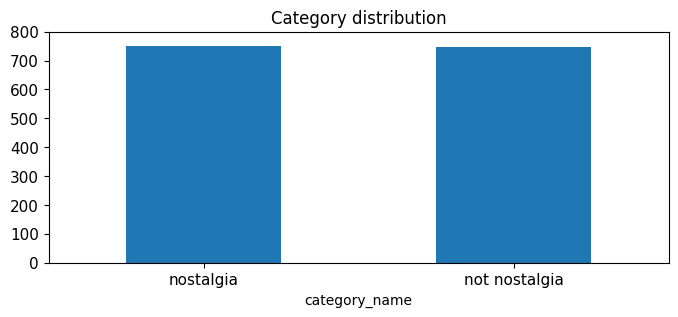

In [146]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 800],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

category_name
nostalgia        501
not nostalgia    499
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

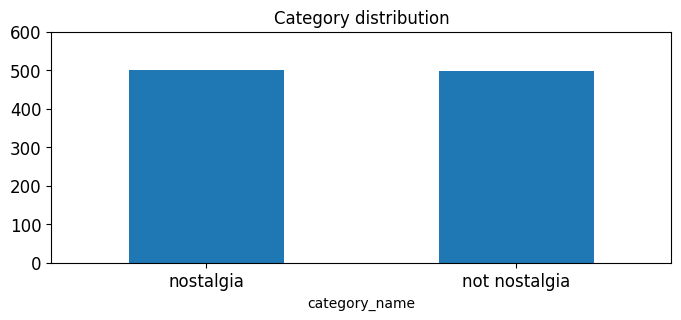

In [148]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 600], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 7 (Watch Video):**

<Axes: title={'center': 'Category distribution 2'}, xlabel='category_name'>

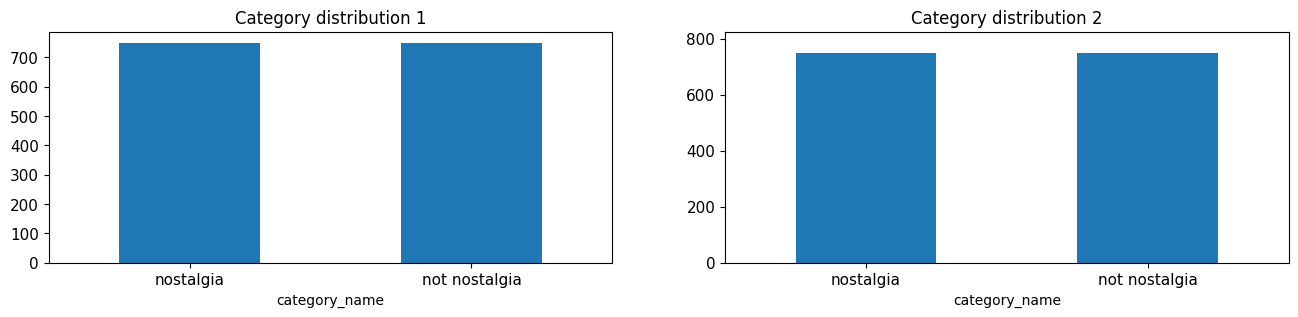

In [149]:
# Answer here
# 方法一，只要不指定ylim，matplotlib就會自動調整y軸的範圍
plt.figure(figsize=(16,3))
plt.subplot(121)

X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution 1',
                                            
                                    rot = 0, fontsize = 11)


# 方法二，通過max()來決定y軸的範圍

plt.subplot(122)
#*1.1讓圖形更好看，不要太貼近上方
max_category = 1.1*X.category_name.value_counts().max()
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution 2',
                                    ylim = [0, max_category],        
                                    rot = 0, fontsize = 11)

### >>> **Exercise 8 (take home):** 

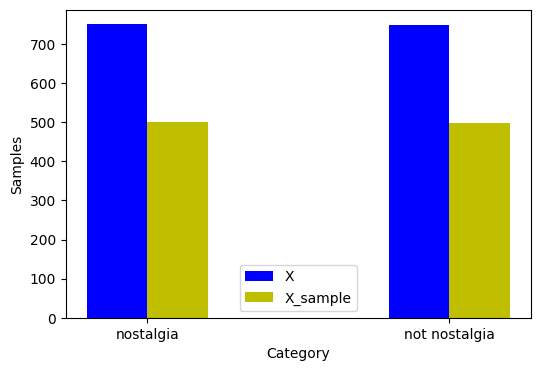

In [150]:
# Answer here
bar1 = X.category_name.value_counts()
bar2 = X_sample.category_name.value_counts()
x = np.array(range(len(bar1)))

plt.figure(figsize=(6,4))
plt.bar(x-0.1, bar1, width=0.2, color='b', label='X',align='center')
plt.bar(x, bar2, width=0.2, color='y', label='X_sample',align='edge')
plt.xticks(x, bar1.index)
plt.xlabel('Category')
plt.ylabel('Samples')
plt.legend()
plt.show()

### 5.2 Feature Creation

In [151]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\530\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [152]:
# takes a like a minute or two to process
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

X['unigrams'] = X['text'].apply(lambda x: tokenize_text(x))

In [153]:
X[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [154]:
X[0:4]

text  category  category_name  \
0  He was a singer with a golden voice that I lov...         0  not nostalgia   
1  The mist beautiful voice ever I listened to hi...         1      nostalgia   
2  I have most of Mr. Reeves songs.  Always love ...         1      nostalgia   
3  30 day leave from 1st tour in Viet Nam to conv...         0  not nostalgia   

                                            unigrams  
0  [He, was, a, singer, with, a, golden, voice, t...  
1  [The, mist, beautiful, voice, ever, I, listene...  
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3  [30, day, leave, from, 1st, tour, in, Viet, Na...

In [155]:
list(X[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

In [156]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (np.int32(0), np.int32(1598))	1
  (np.int32(0), np.int32(3570))	2
  (np.int32(0), np.int32(2973))	1
  (np.int32(0), np.int32(3650))	1
  (np.int32(0), np.int32(1470))	1
  (np.int32(0), np.int32(3534))	1
  (np.int32(0), np.int32(3282))	1
  (np.int32(0), np.int32(2028))	1
  (np.int32(0), np.int32(3336))	1
  (np.int32(0), np.int32(1606))	1
  (np.int32(0), np.int32(233))	2
  (np.int32(0), np.int32(3284))	3
  (np.int32(0), np.int32(3328))	2
  (np.int32(0), np.int32(1651))	2
  (np.int32(0), np.int32(1512))	1
  (np.int32(0), np.int32(1249))	1
  (np.int32(0), np.int32(323))	1
  (np.int32(0), np.int32(214))	1
  (np.int32(0), np.int32(2341))	1
  (np.int32(0), np.int32(15))	1
  (np.int32(0), np.int32(1733))	1
  (np.int32(0), np.int32(3304))	1
  (np.int32(0), np.int32(907))	1
  (np.int32(0), np.int32(258))	2
  (np.int32(0), np.int32(3124))	1
  (np.int32(0), np.int32(2328))	2
  (np.int32(0), np.int32(245))	1
  (np.int32(0), np.int32(3581))	1
  (np.int32(0), np.int32(1591))	1
  (np.int32(0), np.int

In [158]:
#最多到3730，所以我改少一點

count_vect.get_feature_names_out()[1145]

'enjoy'

In [159]:
count_vect.get_feature_names_out()[14]

'16'

In [160]:
count_vect.get_feature_names_out()[696]

'cigar'

In [161]:
count_vect.get_feature_names_out()[3070]

'spanish'

In [162]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

### **>>> Exercise 9 (Watch Video):**

In [163]:
# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
analyze(X[0:1]['text'][0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

---

In [164]:
# We can check the shape of this matrix by:
X_counts.shape

(1498, 3730)

In [165]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [166]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [167]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

### **>>> Exercise 10 (take home):**

In [169]:
# Answer here
#因為第5筆都是0，所以我看第4筆

count_vect.get_feature_names_out()[0:100][X_counts[3, 0:100].toarray()[0]>0]



array(['1st', '2nd', '30'], dtype=object)

---

In [170]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [171]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [172]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

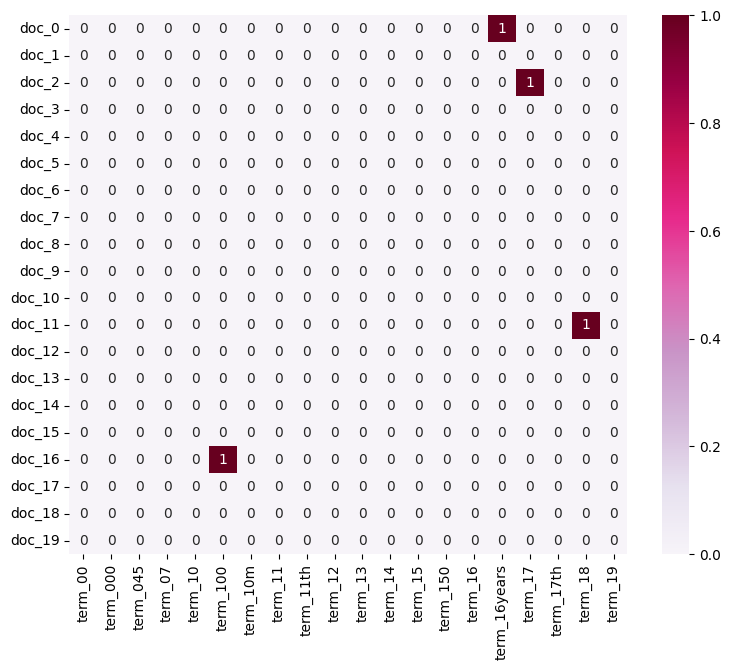

In [173]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

### **>>> Exercise 11 (take home):** 

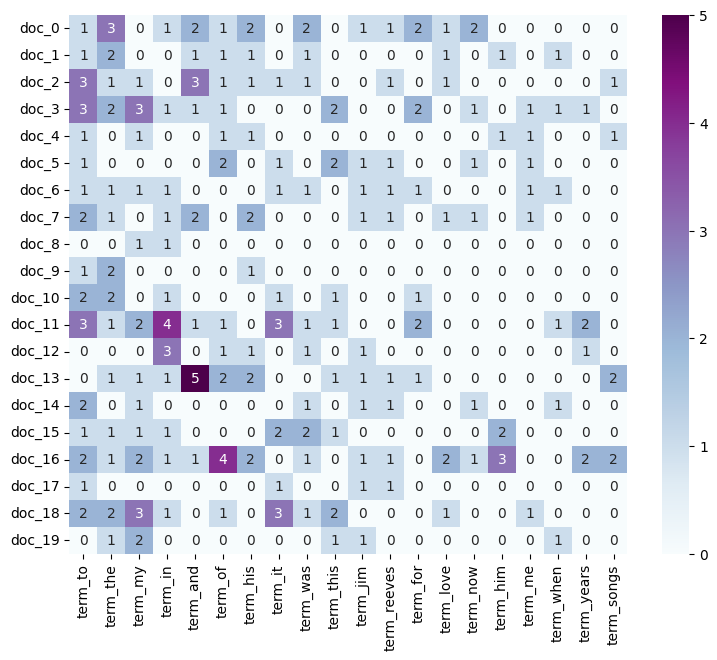

In [174]:
# Answer here

#因為數據非常大，所以我只取出前20個文件中出現頻率最高的20個單字，畫出heatmap

frecuency  = X_counts[0:20].toarray().sum(axis=0)
indices = np.argsort(frecuency)[::-1][:20]

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[indices]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20,indices].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))

#我覺得BuPu比較好看
ax = sns.heatmap(df_todraw,
                 cmap="BuPu",
                 vmin=0,  annot=True)

#可以看到這20個文件中，單字像是定冠詞the,介係詞 to等等出現的頻率最高，可以說非常合乎預期

---

In [175]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,20):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [176]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [177]:
term_frequencies[0] #sum of first term: 00

np.int64(1)

C:\Users\530\AppData\Local\Temp\ipykernel_5940\3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


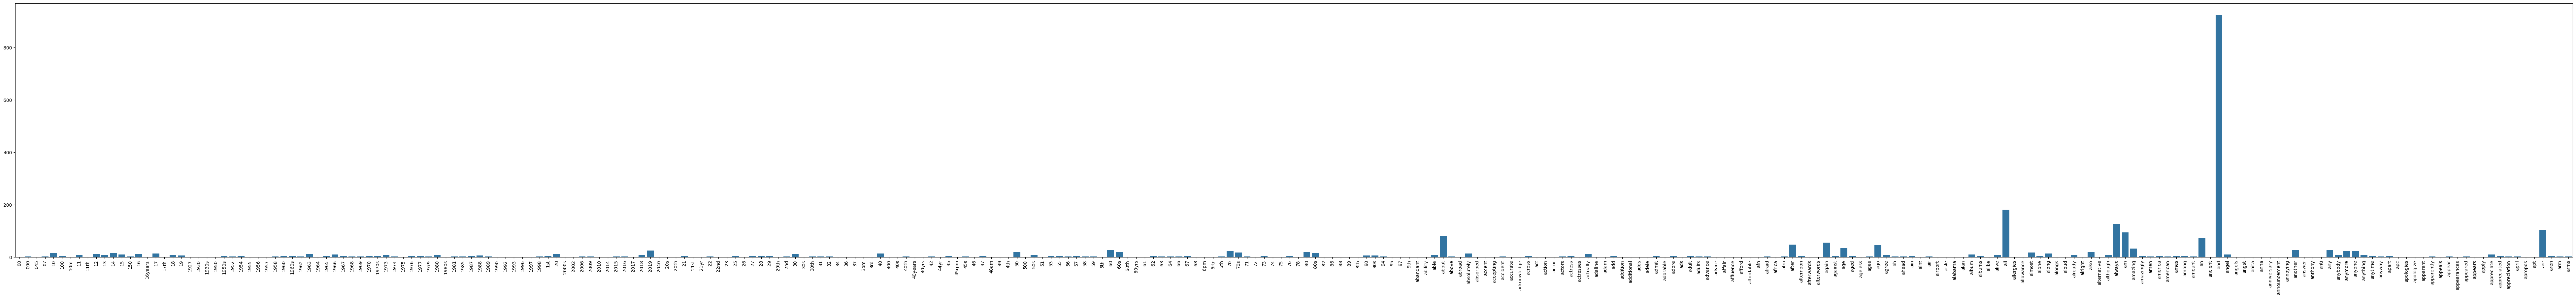

In [178]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 12 (take home):**

In [179]:
# Answer here
import plotly.express as px

fig = px.bar(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies[:300])
fig.show()

### >>> **Exercise 13 (take home):**

In [180]:
# Answer here
#計算出現頻率最高的前100個單字

indices = np.argsort(term_frequencies)[::-1][:100]

#一樣用plotly畫出來
fig = px.bar(x=count_vect.get_feature_names_out()[indices],
                y=term_frequencies[indices])
fig.show()

### >>> **Exercise 14 (take home):** 

In [181]:
# Answer here
#我上面一直都是用這種方法的...，好吧，我再用一次，應該沒關係吧

indices = np.argsort(term_frequencies)[::-1][:300]

#一樣用plotly畫出來
fig = px.bar(x=count_vect.get_feature_names_out()[indices],
                y=term_frequencies[indices])
fig.show()

---

In [182]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\530\AppData\Local\Temp\ipykernel_5940\2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



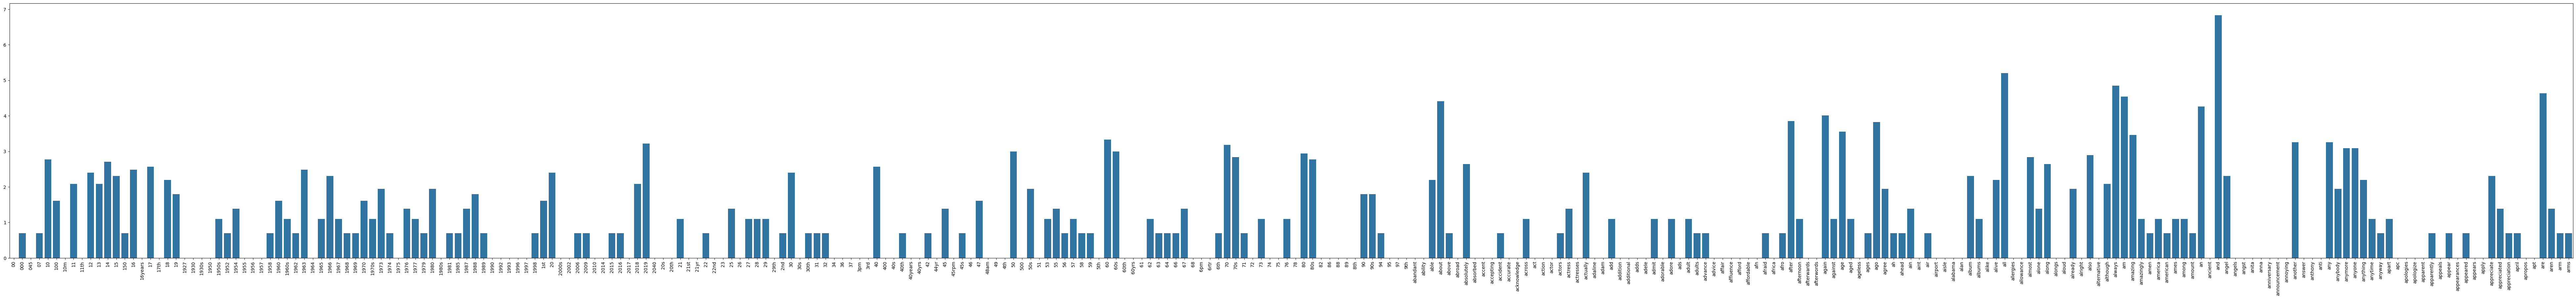

In [183]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 15 (take home):** 

In [184]:
# Answer here
term_frequencies_log = np.array(term_frequencies_log)
indices = np.argsort(term_frequencies_log)[::-1][:300]

#一樣用plotly畫出來
fig = px.bar(x=count_vect.get_feature_names_out()[indices],
                y=term_frequencies_log[indices])
fig.show()

#由於是取log的關係(這裡是對e取log)，所以數據變得更平滑，但是也失去了原本的比例，尤其是在數值較小的時候

---

In [185]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [186]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
743   0    0    0   0    0    0   0   0   0   0  ...         0           0   
744   0    0    0   0    0    0   0   0   0   0  ...         0           0   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0       0         0      0        0    0    0        0      0  
1       0         0      0        0    0    0        0      0  
2       0         0      0        0    0    0        0      0  
3       0         0      0        0    0    0        0      0  
4       0         0      0        0    0    0        0      0  
..    ...       ...    ...      ...  ...  ...      ...    ...  
743     0         0      0        0    0    0        0      0  
744     0         0      0        0    0    0        0      0  
745     0         0      0        0    0    0        0      0  
746     1         0      0        0    0    0        0      0  
747     0         0      0        0    0    0        0      0  

[748 rows x 2602 columns]

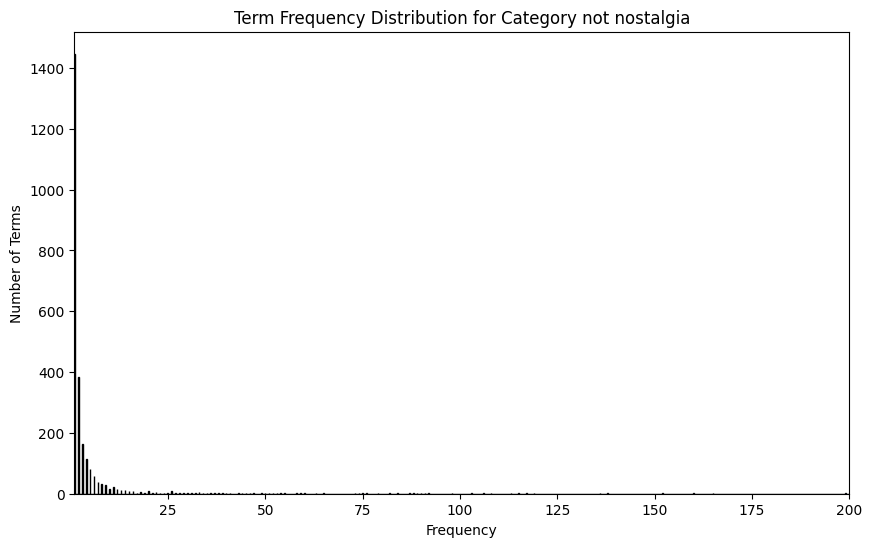

In [188]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [189]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'not', 'on', 'be', 'what', 'can', 'me', 'voice', 'just', 'songs', 'as', 'beautiful', 'her', 'time', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'know', 'now', 'never', 'about', 'much', 'who', 'really', 'if', 'we', 'more', 'best', 'by', 'ever', 'thank', 'think', 'would', 'only', 'don', 'still', 'how', 'has', 'very', 'am', 'there', 'out', 'could', 'him', 'these', 'old', 'up', 'do', 'listen', 'hear', 'an', 'singer', 'had', 'many', 'here', 'too', 'version', 'such', 'today', 'been', 'most', 'get', 'world', 'people', 'your', 'man', 'video', 'some', 'listening', 'heard', 'sing', 'years', 'real', 'were', 'than', 'singing', 'heart', 'nice', 'their', 'better', 'life', 'its', 'day', 'sad', 'those', 'then', 'god',

In [190]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['20th', '21st', '21yr', '28', '30s', '30th', '32', '37', '1952', '1955', '1957', '12', '2010', '2017', '2018', '2040', 'worthwhile', '64', '67', '74', '76', '95', '1930', '1930s', 'wonderfully', 'wondering']


In [191]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category not nostalgia we filter the following words:
Bottom 1.0% words: 
20th           1
21st           1
21yr           1
28             1
30s            1
30th           1
32             1
37             1
1952           1
1955           1
1957           1
12             1
2010           1
2017           1
2018           1
2040           1
worthwhile     1
64             1
67             1
74             1
76             1
95             1
1930           1
1930s          1
wonderfully    1
wondering      1
dtype: int64
Top 5.0% words: 
them      23
first     23
got       23
wish      24
or        25
        ... 
of       361
to       394
and      451
this     451
the      708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
1964          1
1969          1
1975          1
1980s         1
1981          1
wonderfull    1
wood          1
working       1
mad           1
maddox        1
madrid        1
maggie        1
1927         

00  000  045  10  100  10m  11  14  15  150  ...  younger  youngest  \
0     0    0    0   0    0    0   0   0   0    0  ...        0         0   
1     0    0    0   0    0    0   0   0   0    0  ...        0         0   
2     0    0    0   0    0    0   0   0   0    0  ...        0         0   
3     0    0    0   0    0    0   0   0   0    0  ...        0         0   
4     0    0    0   0    0    0   0   0   0    0  ...        0         0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ...  ...      ...       ...   
743   0    0    0   0    0    0   0   0   0    0  ...        0         0   
744   0    0    0   0    0    0   0   0   0    0  ...        0         0   
745   0    0    0   0    0    0   0   0   0    0  ...        0         0   
746   0    0    0   0    0    0   0   0   0    0  ...        0         0   
747   0    0    0   0    0    0   0   0   0    0  ...        0         0   

     youngsters  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0             0         0      0        0    0    0        0      0  
1             0         0      0        0    0    0        0      0  
2             0         0      0        0    0    0        0      0  
3             0         0      0        0    0    0        0      0  
4             0         0      0        0    0    0        0      0  
..          ...       ...    ...      ...  ...  ...      ...    ...  
743           0         0      0        0    0    0        0      0  
744           0         0      0        0    0    0        0      0  
745           0         0      0        0    0    0        0      0  
746           0         0      0        0    0    0        0      0  
747           0         0      0        0    0    0        0      0  

[748 rows x 2446 columns]

### >>> **Exercise 16 (take home):** 

In [ ]:
# Answer here
#最頻繁出現的字都是界系詞一類的，所以可以透過這個方法來過濾掉這些字，讓我們的結果集中在更有意義的字
#最底端的有些是亂碼，看起來可能是拼錯的字或特殊符號


---

In [192]:
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.227146505233723
Variance in Transaction Sizes : 52.30290397046961
Sparsity : 0.9959733855996001


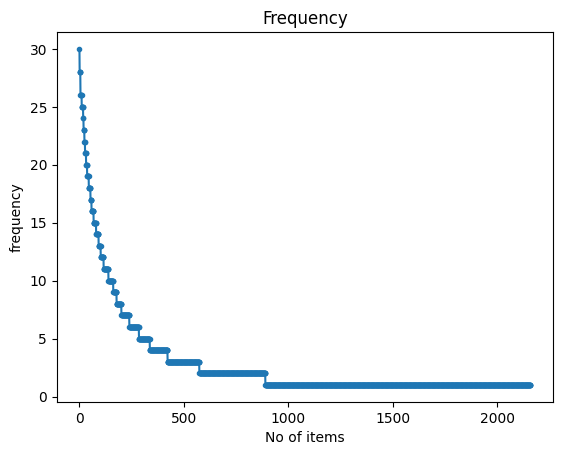

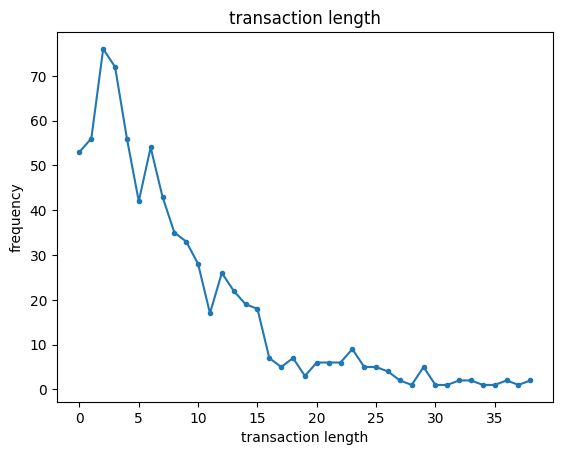

In [194]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.405369127516778
Maximum Transaction Size : 47
Standard Deviation Transaction Size : 5.930195569677053
Variance in Transaction Sizes : 35.214487262755284
Sparsity : 0.9965636266853979


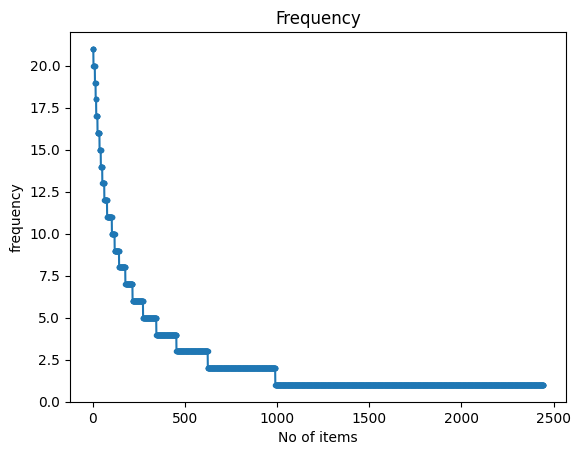

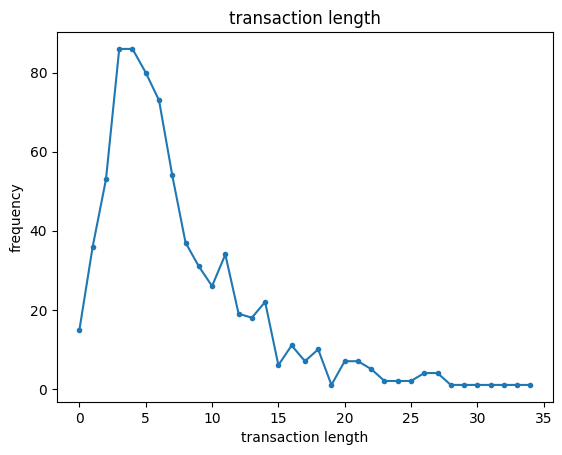

In [195]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [196]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.009076118469238281


In [197]:
obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_sci_med

Patterns  Support
0        find        9
1        down        9
2         few        9
3         its        9
4        sure        9
..        ...      ...
175      ever       28
176     would       28
177      will       28
178        go       28
179  favorite       30

[180 rows x 2 columns]

In [198]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_alt_atheism))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.006980419158935547


In [199]:
obj2.save('freq_patterns_not nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_alt_atheism

Patterns  Support
0    favorites        9
1      special        9
2         soul        9
3         mind        9
4           60        9
..         ...      ...
139      elvis       21
140      every       21
141      loved       21
142    classic       21
143     lyrics       21

[144 rows x 2 columns]

In [200]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_alt_atheism]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

    Patterns  Support
127     will       28
125     ever       28
126    would       28
123       or       26
119      kid       26
..       ...      ...
135   others        9
136     pure        9
137   please        9
138   though        9
139   wonder        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [201]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  almost  end  family  \
0      0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1      0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
2      0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
3      0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
4      0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...  ...     ...   
1495   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1496   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1497   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1498   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1499   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   

      ones  things  others  pure  please  though  wonder  
0        0       0       0     0       0       0       0  
1        0       0       0     0       0       0       0  
2        0       0       0     0       0       0       0  
3        0       0       0     0       0       0       0  
4        0       0       0     0       0       0       0  
...    ...     ...     ...   ...     ...     ...     ...  
1495     0       0       0     0       0       0       0  
1496     0       0       0     0       0       0       0  
1497     0       0       0     0       0       0       0  
1498     0       0       1     0       0       0       0  
1499     0       0       0     0       0       0       0  

[1498 rows x 3950 columns]

### >>> **Exercise 17 (take home):** 

In [203]:
# Answer Here
#FAE
#跑1000跟1500的時候因為沒有所以無限迴圈，所以我改成100跟250、500
import PAMI.frequentPattern.topk.FAE as alg
TopK = [100, 250, 500]
for k in TopK:
    obj = alg.FAE(iFile='td_freq_db_nostalgia.csv', k=k)
    obj.mine()
    topKFrequentPatterns= obj.getPatternsAsDataFrame()
    print(f'k:{k}-Total No of patterns: ' + str(len(topKFrequentPatterns))) #print the total number of patterns
    print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
    obj.save(f'freq_patterns_comp_graphics_top{k}.txt') #save the patterns
    print(topKFrequentPatterns)

 TopK frequent patterns were successfully generated using FAE algorithm.
k:100-Total No of patterns: 100
Runtime: 0.008906364440917969
    Patterns  Support
0   favorite       30
1       ever       28
2      would       28
3       will       28
4         go       28
..       ...      ...
95     while       13
96      last       13
97        10       13
98      eyes       13
99    lyrics       13

[100 rows x 2 columns]
 TopK frequent patterns were successfully generated using FAE algorithm.
k:250-Total No of patterns: 250
Runtime: 0.017337560653686523
                Patterns  Support
0               favorite       30
1                   ever       28
2                  would       28
3                   will       28
4                     go       28
..                   ...      ...
245                60 50        7
246  yesterday more once        7
247       more yesterday        7
248            more once        7
249                liked        6

[250 rows x 2 columns]
 TopK freq

In [205]:
# Answer Here
#MaxFPGrowth
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg
minSups=[3,6,9]
for minSup in minSups:
    obj = alg.MaxFPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
    obj.mine()
    MaxFPGrowthDF_comp_graphics= obj.getPatternsAsDataFrame()
    print(f'MinSup:{minSup}-Total No of patterns: ' + str(len(MaxFPGrowthDF_comp_graphics))) #print the total number of patterns
    print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
    obj.save(f'MaxFPGrowth_comp_graphics_minSup{minSup}.txt') #save the patterns
    print(MaxFPGrowthDF_comp_graphics)

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MinSup:3-Total No of patterns: 682
Runtime: 0.03234076499938965
           Patterns  Support
0          skating         3
1           walker         3
2            scott         3
3          17 1987         3
4             stop         3
..              ...      ...
677      will such         4
678      ever only         3
679     would only         4
680       ever kid         3
681  favorite will         3

[682 rows x 2 columns]
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MinSup:6-Total No of patterns: 274
Runtime: 0.013066768646240234
      Patterns  Support
0        1973         6
1     looking         6
2    actually         6
3        fast         6
4    innocent         6
..         ...      ...
269      only        26
270       kid        26
271     would        28
272      ever        28
273  favorite        30

[274 rows x 2 columns]
Maximal Frequent pa

In [ ]:
# Answer Here
# 隨著K的增加，找到的pattern數量會增加，這是因為K是最大頻繁項集的數量，並且所需時間也隨著增加
# 隨著minSup的增加，找到的pattern數量會減少，這是因為minSup是最小支持度，只有出現次數大於minSup的pattern才會被找到，因此所需時間隨著minSup增加而減少
# 並且可以發現這2種模型找到的最高support的pattern都是一樣的，只是這2種模型找到的pattern似乎不同於FPGgrowth，FPGrowth找到的pattern都是一個字，而這2種模型找到的pattern可以是多個字組成的

---

In [206]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [207]:
X_pca_tdm.shape

(1498, 2)

In [208]:
X_tsne_tdm.shape

(1498, 2)

In [209]:
X_umap_tdm.shape

(1498, 2)

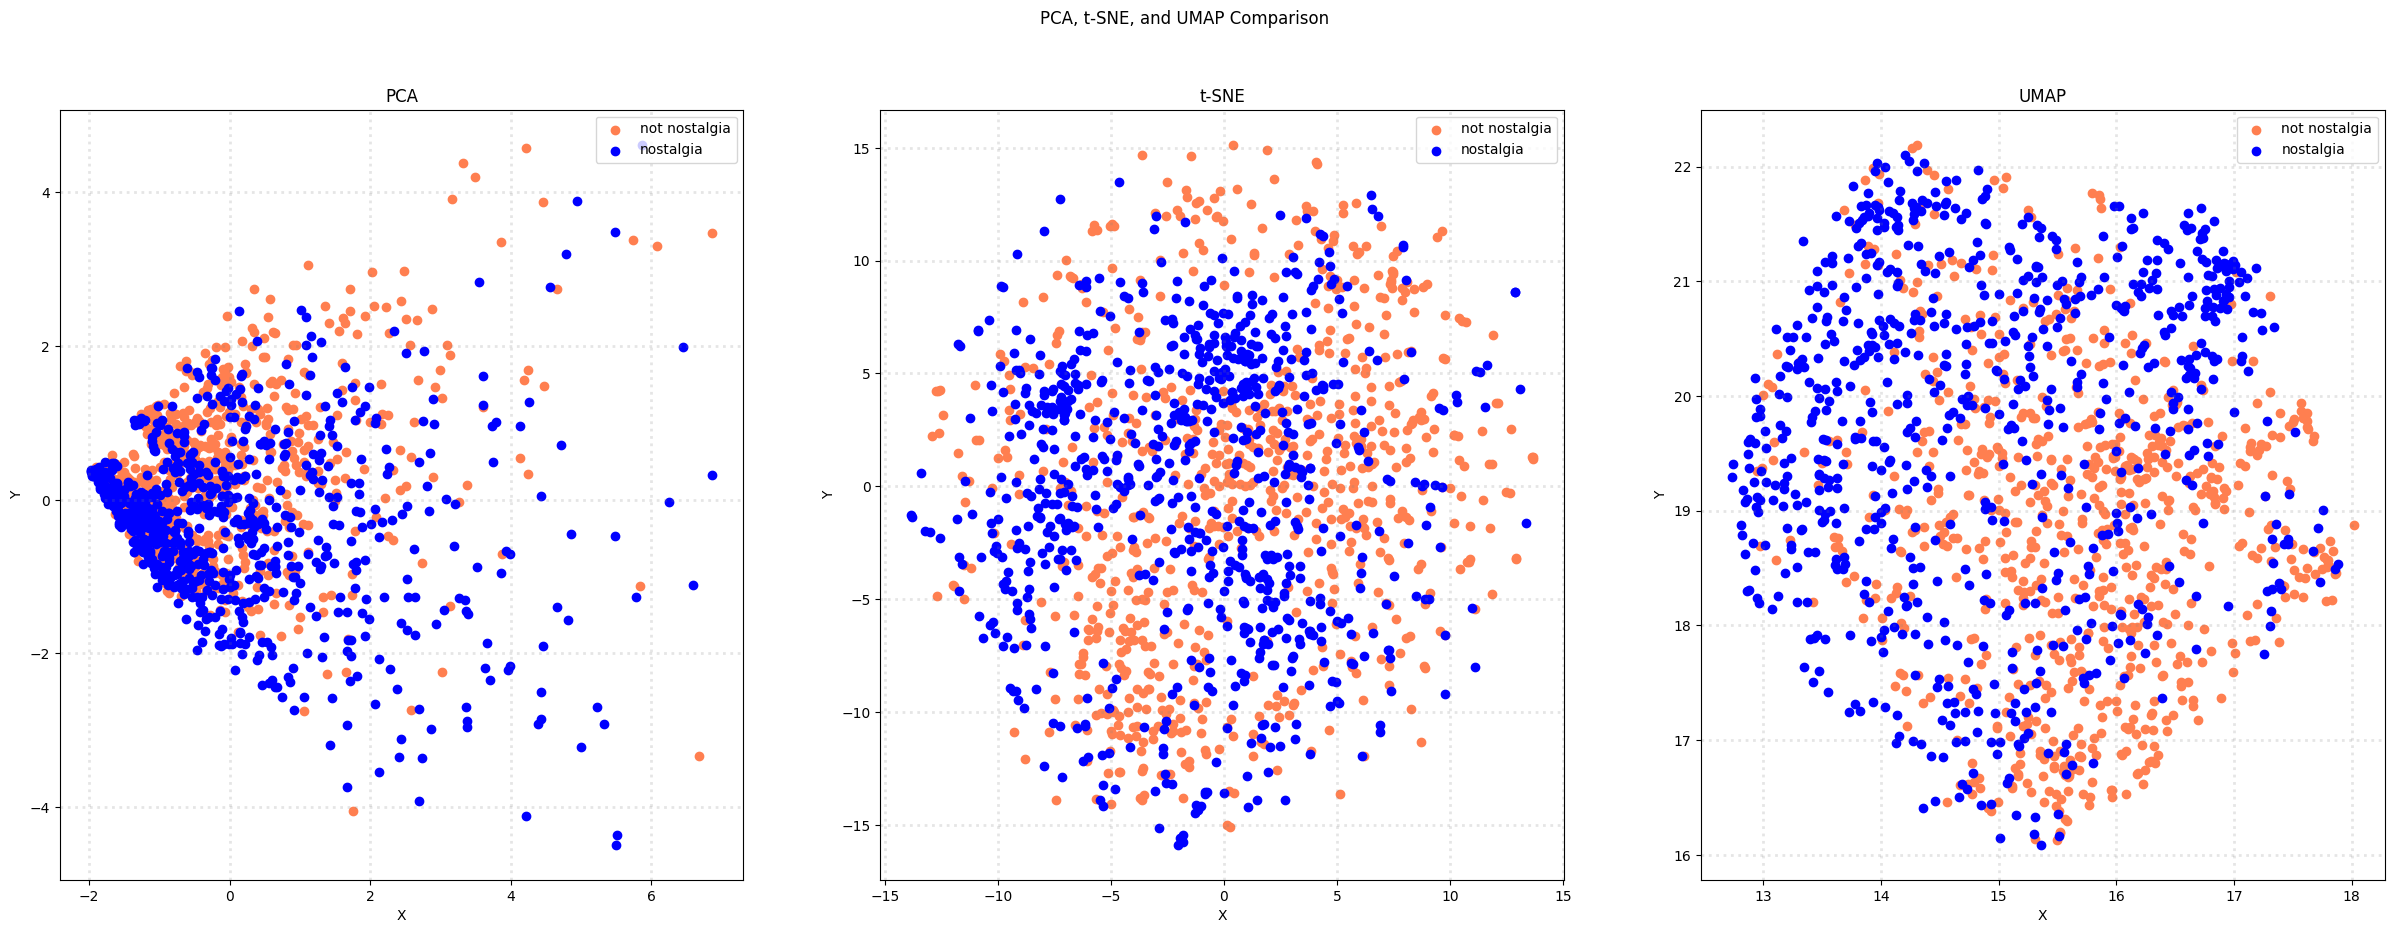

In [210]:
# Plot the results in subplots
col = ['coral', 'blue']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [212]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

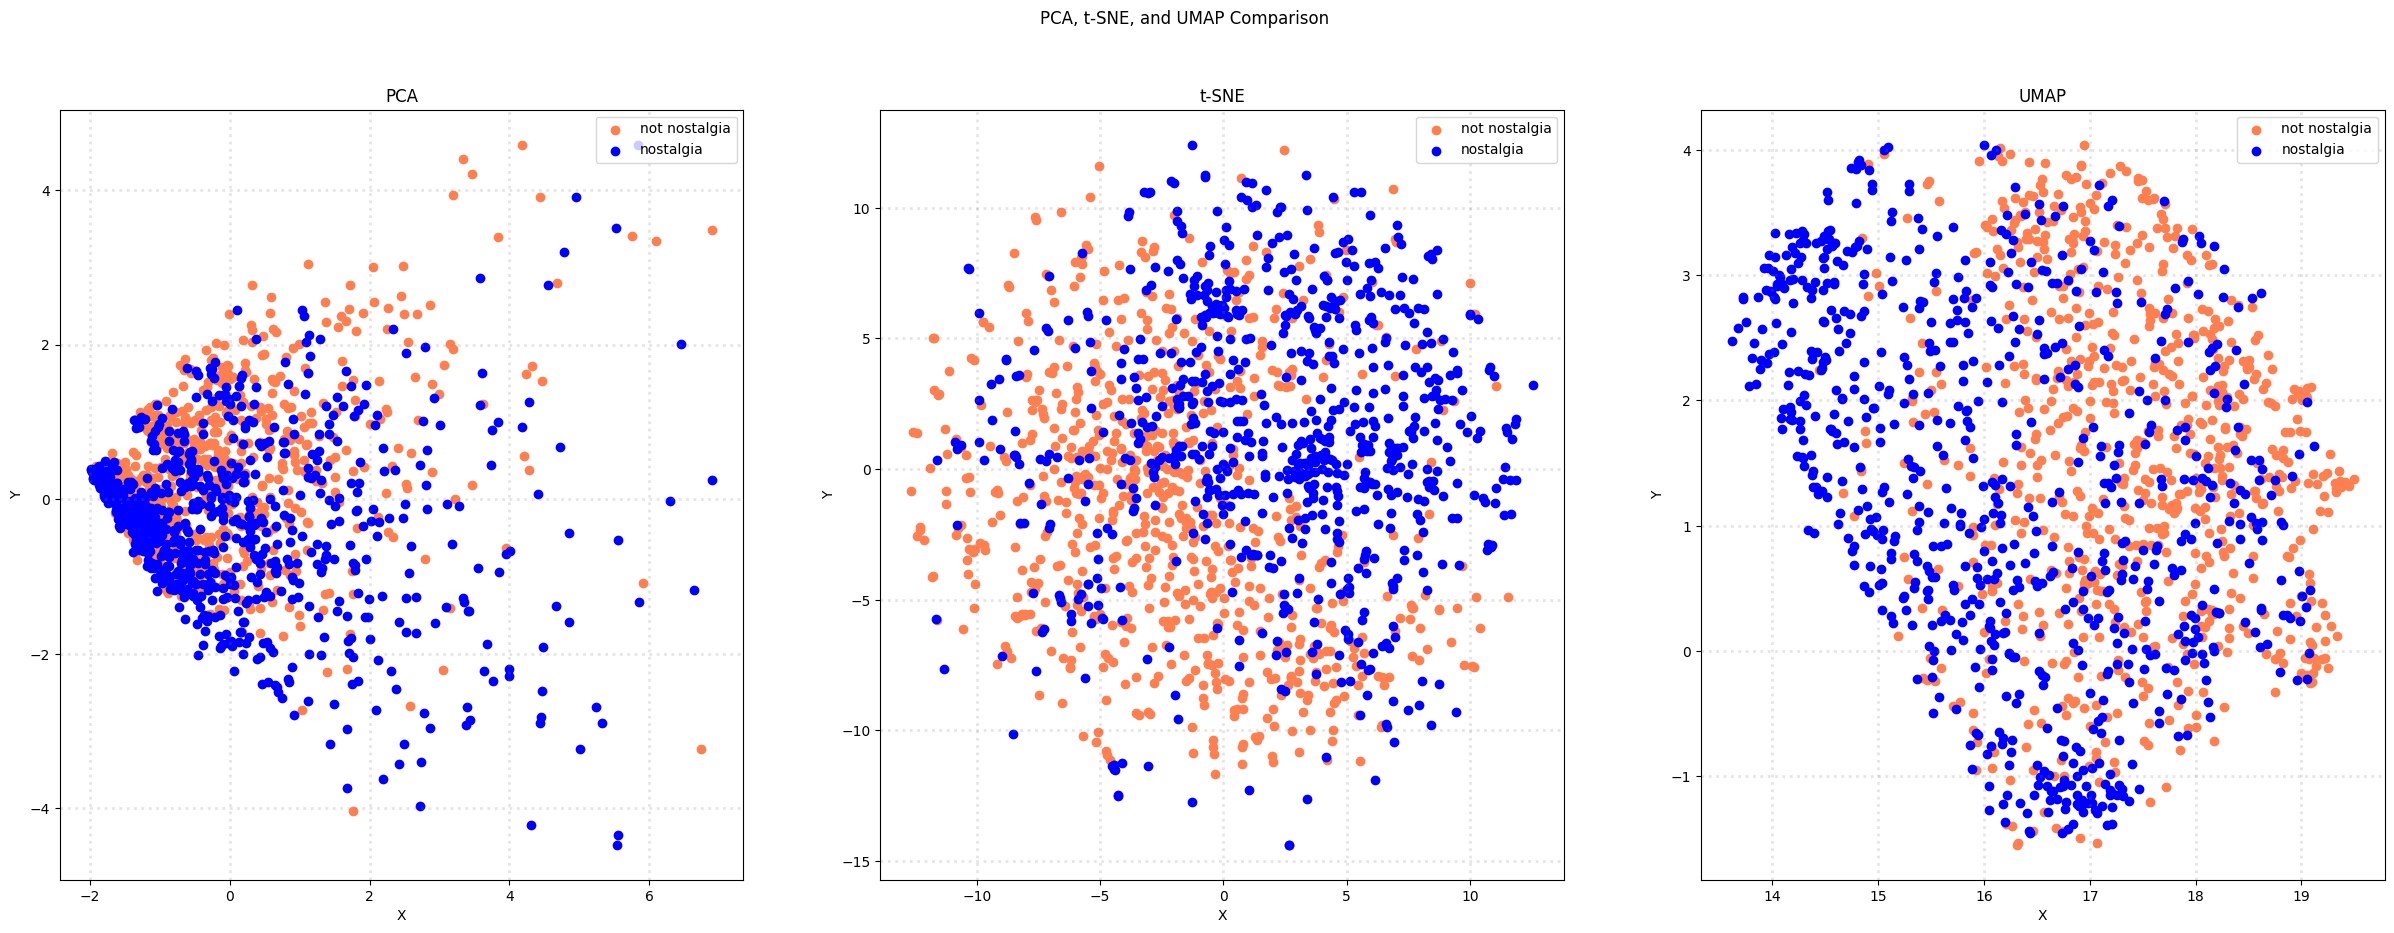

In [213]:
# Plot the results in subplots
col = ['coral', 'blue']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

### >>> Exercise 18 (take home):

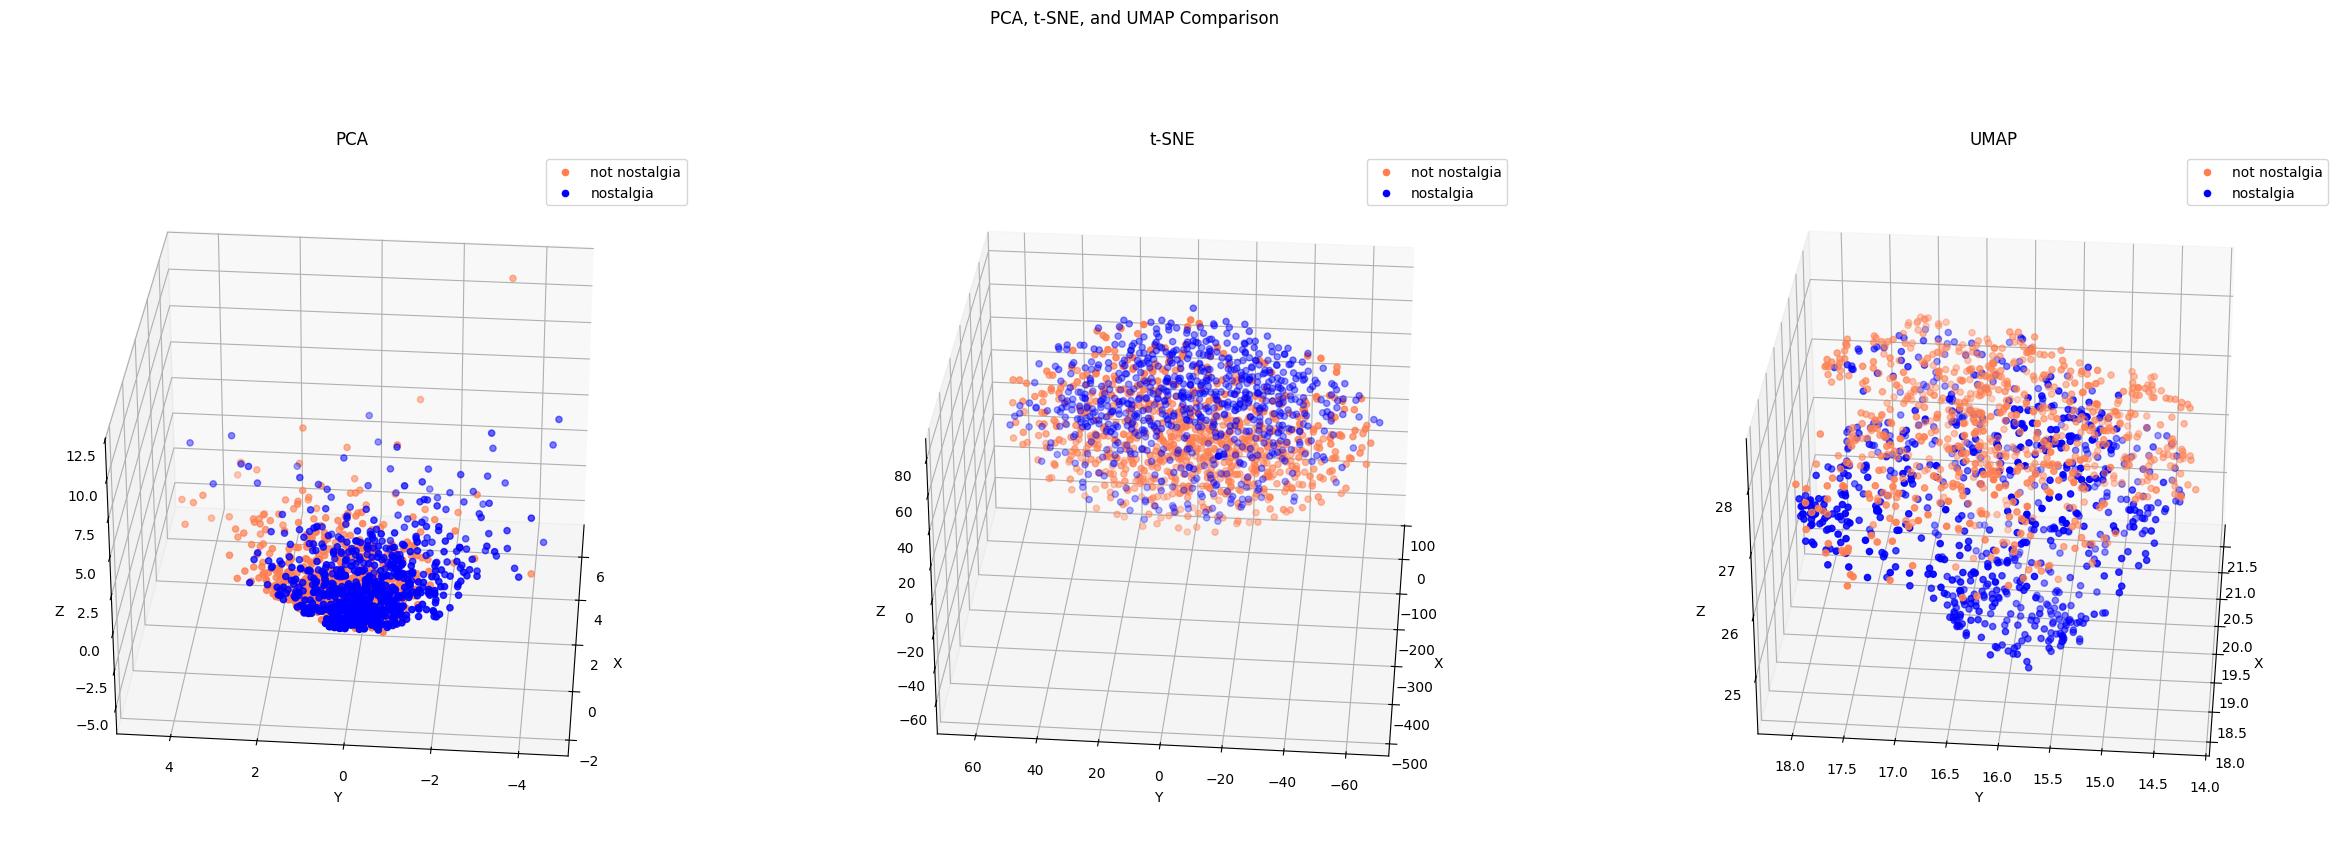

In [214]:
# Answer here
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df)

col = ['coral', 'blue']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10),subplot_kw={'projection': '3d'})  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):

        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')
axes[0].view_init(30, 185)
axes[1].view_init(30, 185)
axes[2].view_init(30, 185)

plt.show()

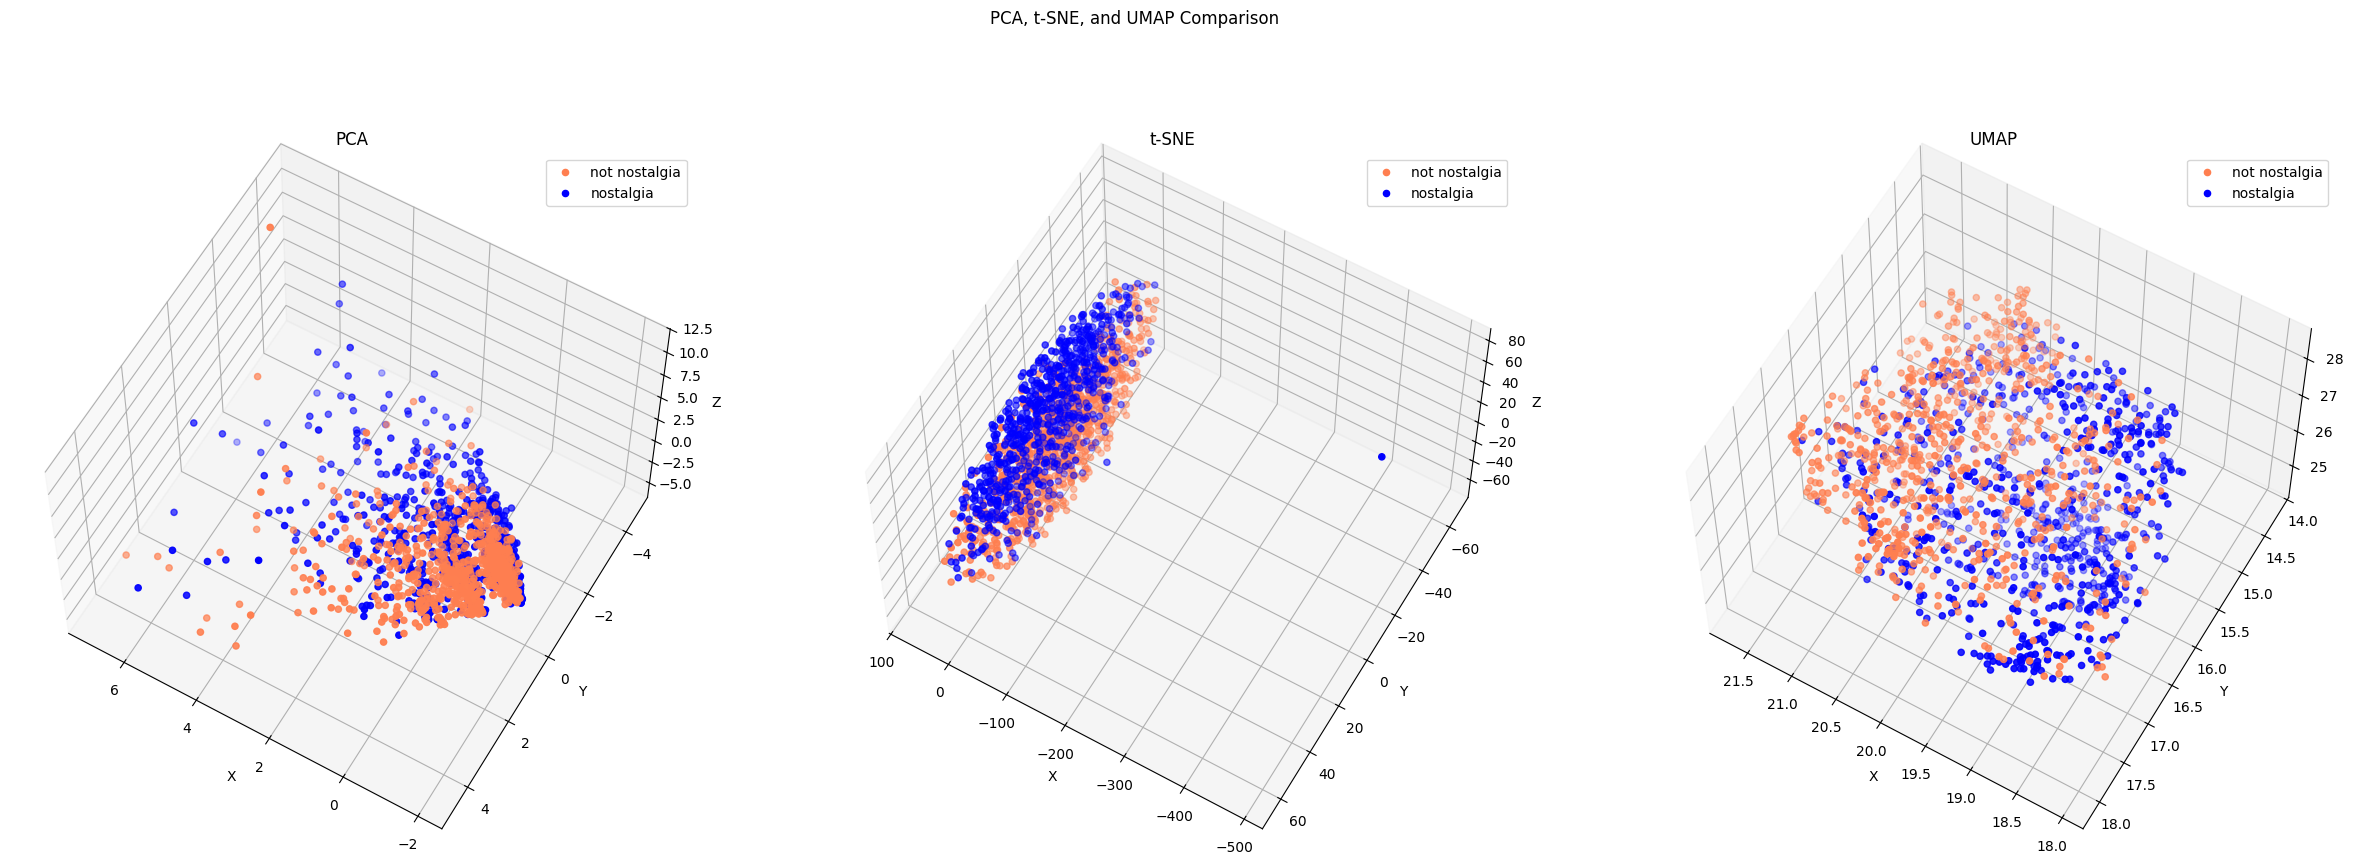

In [215]:
# Answer here
fig, axes = plt.subplots(1, 3, figsize=(30, 10),subplot_kw={'projection': '3d'})  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')
axes[0].view_init(60, 120)
axes[1].view_init(60, 120)
axes[2].view_init(60, 120)

plt.show()

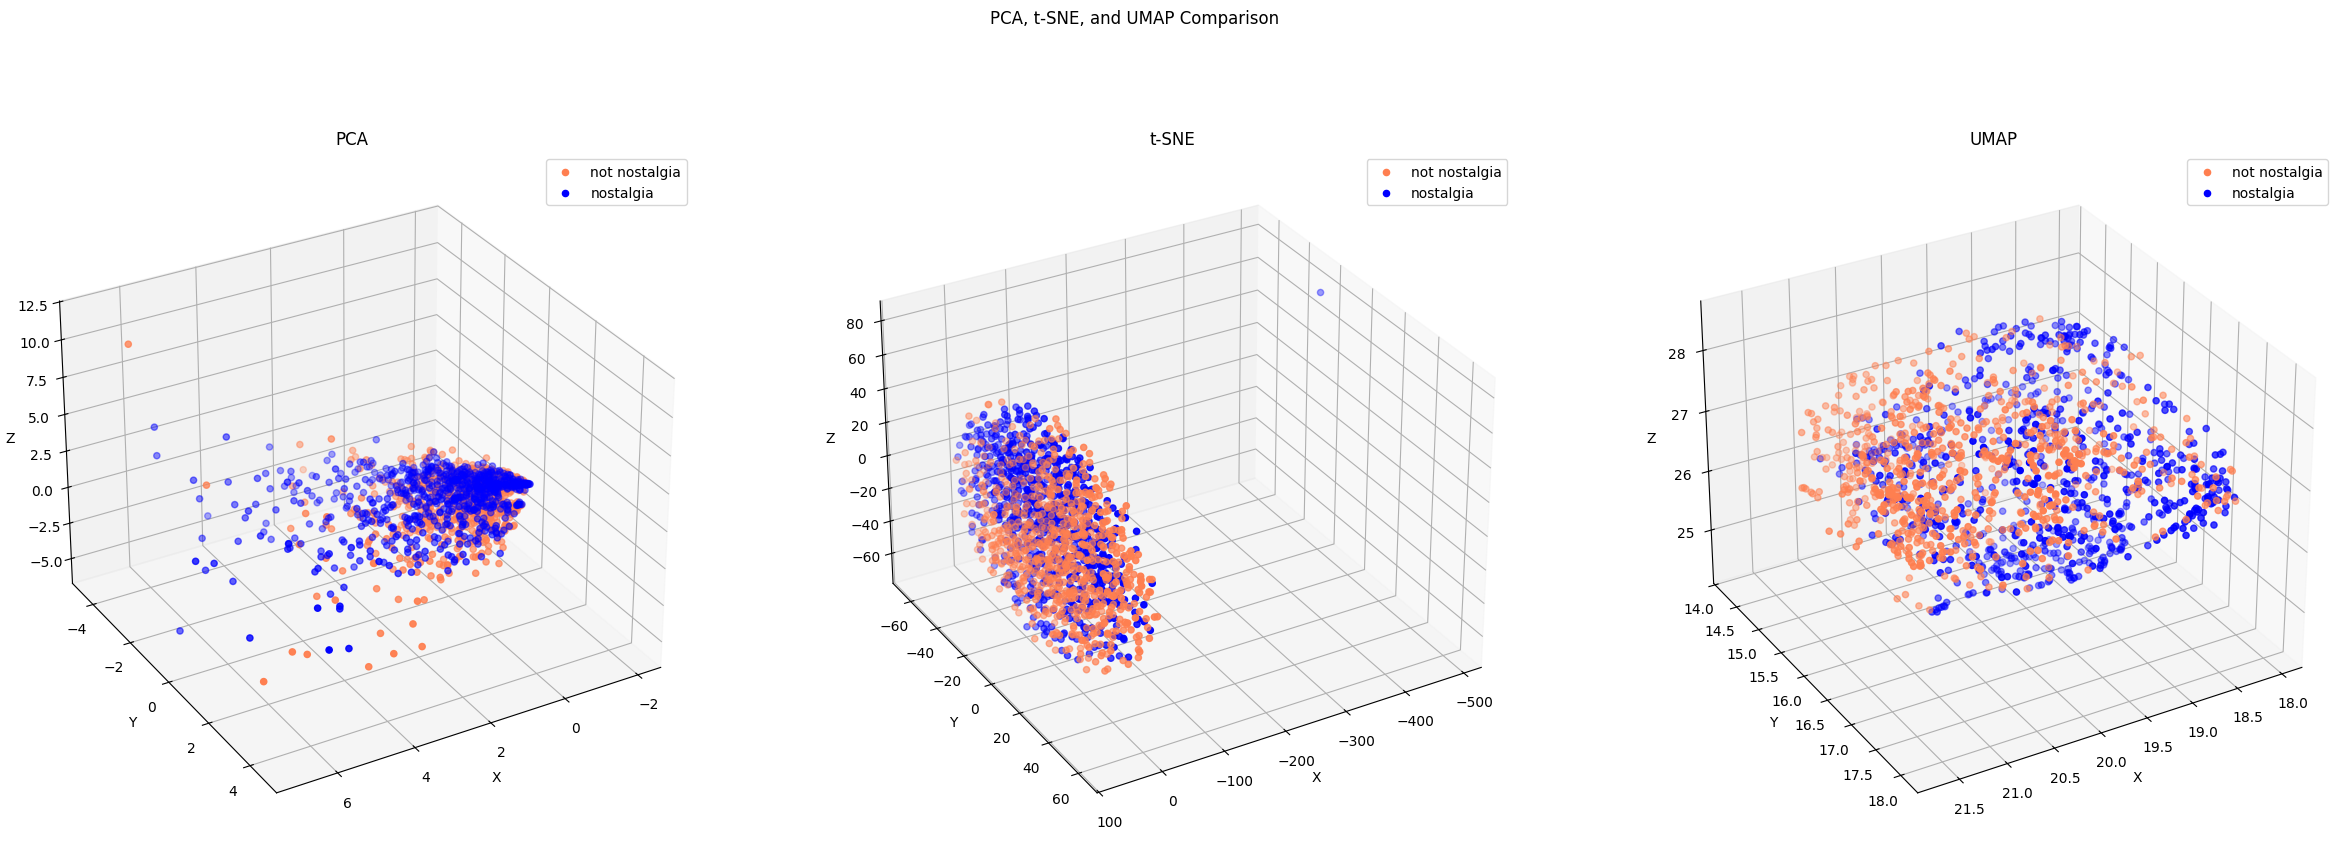

In [216]:
# Answer here
fig, axes = plt.subplots(1, 3, figsize=(30, 10),subplot_kw={'projection': '3d'})  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')
axes[0].view_init(30, 60)
axes[1].view_init(30, 60)
axes[2].view_init(30, 60)

plt.show()

In [217]:
# Answer here
# 我隨便調了3個不同的角度看看，可是我覺得結果還是跟2d的差不多，他們還是都擠在一團，不過3d的圖看起來比較立體，可以看到不同的點在空間中的分布

---

In [218]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [219]:
mlb = preprocessing.LabelBinarizer()

In [220]:
mlb.fit(X.category)

LabelBinarizer()

In [221]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [222]:
X[0:9]

text  category  category_name  \
0  He was a singer with a golden voice that I lov...         0  not nostalgia   
1  The mist beautiful voice ever I listened to hi...         1      nostalgia   
2  I have most of Mr. Reeves songs.  Always love ...         1      nostalgia   
3  30 day leave from 1st tour in Viet Nam to conv...         0  not nostalgia   
4  listening to his songs reminds me of my mum wh...         1      nostalgia   
5  Every time I heard this song as a child, I use...         1      nostalgia   
6  My dad loved listening to Jim Reeves, when I w...         1      nostalgia   
7  i HAVE ALSO LISTENED TO Jim Reeves since child...         1      nostalgia   
8           Wherever you  are you always in my heart         0  not nostalgia   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4  [listening, to, his, songs, reminds, me, of, m...   
5  [Every, time, I, heard, this, song, as, a, chi...   
6  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8   [Wherever, you, are, you, always, in, my, heart]   

                                      tokenized_text bin_category  
0  {we, I, that, to, in, with, He, age, hear, Lor...          [0]  
1  {I, to, angel, an, was, still, listened, The, ...          [1]  
2  {grow, think, leave, I, up, graduated, like, t...          [1]  
3  {life, leave, I, 2nd, greatest, to, served, in...          [0]  
4  {me, of, my, played, songs, him, who, listenin...          [1]  
5  {as, used, got, souls., Every, touches, I, hea...          [1]  
6  {changes, listening, My, I, to, in, it, was, T...          [1]  
7  {music., HAVE, I, to, ALSO, 71, in, with, TO, ...          [1]  
8        {my, Wherever, are, you, in, heart, always}          [0]

### >>> **Exercise 19 (take home):**

In [223]:
# Answer here
mlb.fit(X.category_name)
test = mlb.transform(X['category_name']).tolist()
print(test[0:9])

#yes, it work

[[1], [0], [0], [1], [0], [0], [0], [0], [1]]


# 6. Data Exploration

In [224]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [225]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['I love this song reminds me of the love of my life']
['TURN MY MEMORIES BACK IN 1993, TO LAURA FROM COMO, ITALIA, THANK YOU, THANK YOU, THANK YOU']


In [226]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [227]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.190347
Cosine Similarity using count bw 1 and 3: 0.027379
Cosine Similarity using count bw 2 and 3: 0.047946
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\530\AppData\Local\Temp\ipykernel_5940\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\530\AppData\Local\Temp\ipykernel_5940\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\530\AppData\Local\Temp\ipykernel_5940\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\530\AppData\Local\Temp\ipykernel_5940\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is de

# 7. Data Classification

In [228]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

In [229]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
890    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1397   0    0    0   0   0    0    0   0     0   0  ...      0         0   
709    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1273   0    0    0   0   0    0    0   0     0   0  ...      0         0   
940    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1132   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1296   0    0    0   0   0    0    0   0     0   0  ...      0         0   
862    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1461   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1128   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
890       0         0        0    0    0    0        0      0  
1397      0         0        0    0    0    0        0      0  
709       0         0        0    0    0    0        0      0  
1273      0         0        0    0    0    0        0      0  
940       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1132      0         0        0    0    0    0        0      0  
1296      0         0        0    0    0    0        0      0  
862       0         0        0    0    0    0        0      0  
1461      0         0        0    0    0    0        0      0  
1128      0         0        0    0    0    0        0      0  

[1048 rows x 3730 columns]

In [230]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
1035   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1307   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1437   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1491   0    0    0   0   0    0    0   0     0   0  ...      0         0   
790    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1231   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1275   0    0    0   0   0    0    0   0     0   0  ...      0         0   
484    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1329   0    0    0   0   0    0    0   0     0   0  ...      0         0   
201    0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
1035      0         0        0    0    0    0        0      0  
1307      0         0        0    0    0    0        0      0  
1437      0         0        0    0    0    0        0      0  
1491      0         0        0    0    0    0        0      0  
790       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1231      1         0        0    0    0    0        0      0  
1275      0         0        0    0    0    0        0      0  
484       0         0        0    0    0    0        0      0  
1329      0         0        0    0    0    0        0      0  
201       0         0        0    0    0    0        0      0  

[450 rows x 3730 columns]

In [231]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8822222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9463    0.8220    0.8798       236
    nostalgia     0.8286    0.9486    0.8845       214

     accuracy                         0.8822       450
    macro avg     0.8875    0.8853    0.8822       450
 weighted avg     0.8903    0.8822    0.8821       450



In [232]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)

In [233]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  almost  end  family  \
890    0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1397   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
709    0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1273   0    0    0   0   0    0    0   0     0   0  ...       1    0       0   
940    0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...  ...     ...   
1132   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1296   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
862    0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1461   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1128   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   

      ones  things  others  pure  please  though  wonder  
890      0       0       0     0       0       0       0  
1397     0       0       0     0       0       0       0  
709      0       0       0     0       0       0       0  
1273     0       0       0     0       0       1       0  
940      0       0       0     0       0       0       0  
...    ...     ...     ...   ...     ...     ...     ...  
1132     0       0       0     0       0       0       0  
1296     0       0       0     0       0       0       0  
862      0       0       0     0       0       0       0  
1461     0       0       0     0       0       0       0  
1128     0       0       0     0       0       0       0  

[1048 rows x 3950 columns]

In [234]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  almost  end  family  \
1035   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1307   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1437   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1491   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
790    0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...  ...     ...   
1231   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1275   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
484    0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1329   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
201    0    0    0   0   0    0    0   0     0   0  ...       0    0       0   

      ones  things  others  pure  please  though  wonder  
1035     0       0       0     0       0       0       0  
1307     0       0       0     0       0       0       0  
1437     0       0       0     0       0       0       0  
1491     0       0       0     0       0       0       0  
790      0       0       0     0       0       0       0  
...    ...     ...     ...   ...     ...     ...     ...  
1231     0       0       0     0       0       0       0  
1275     0       0       0     0       0       0       0  
484      0       0       0     0       0       0       0  
1329     0       0       0     0       0       0       0  
201      0       0       0     0       0       0       0  

[450 rows x 3950 columns]

In [235]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

#使用augmented data後準確率卻下降了，這可能是因為pattern的數量較少，在剔除頻繁與不頻繁的pattern後，導致特徵減少?

Accuracy: 0.8777777777777778

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9289    0.8305    0.8770       236
    nostalgia     0.8326    0.9299    0.8786       214

     accuracy                         0.8778       450
    macro avg     0.8808    0.8802    0.8778       450
 weighted avg     0.8831    0.8778    0.8777       450



---
######################################

Third: here

new data visualizations

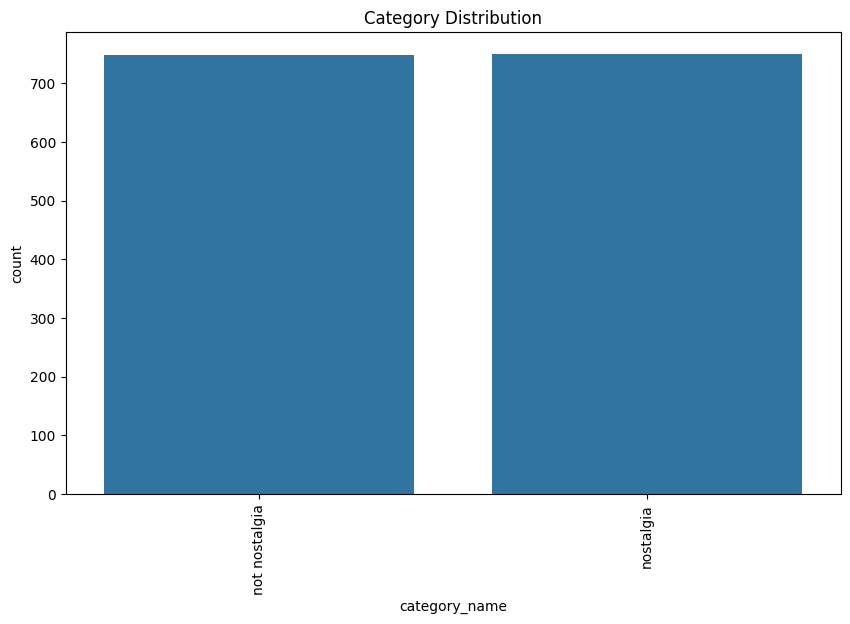

In [245]:
# 顯示 category 的分佈情況
plt.figure(figsize=(10, 6))
sns.countplot(data=X, x='category_name')
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

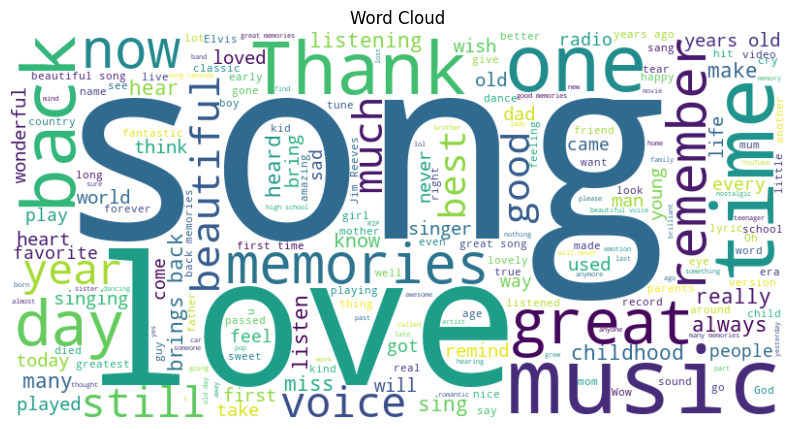

In [250]:
from wordcloud import WordCloud

# 把所有的文字連接起來，形成詞雲
all_text = " ".join(X['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

#這效果比我想像的好很多

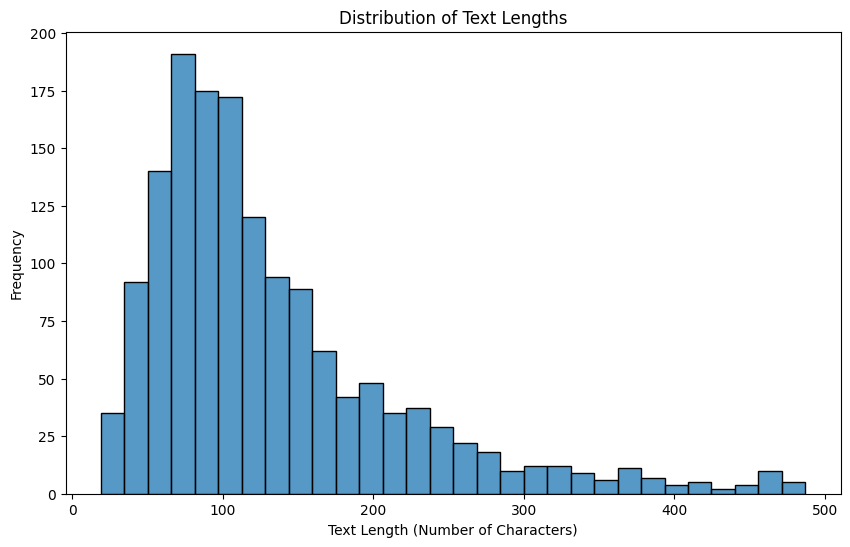

In [252]:
#文本長度分析
X['text_length'] = X['text'].apply(len)

# 繪製文本長度分佈的直方圖
plt.figure(figsize=(10, 6))
sns.histplot(X['text_length'], bins=30)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (Number of Characters)')
plt.ylabel('Frequency')
plt.show()

---

TF-IDF features

In [262]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X['text'])

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

#計算每個詞的tf-idf分數
tfidf_scores = tfidf_df.mean().sort_values(ascending=False)

print(tfidf_df)

       00  000  045   07   10  100  10m   11  11th   12  ...  yours  yourself  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...       ...   
1493  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1494  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1495  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1496  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1497  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   

      youth  youthful  yout

C:\Users\530\AppData\Local\Temp\ipykernel_5940\489549551.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



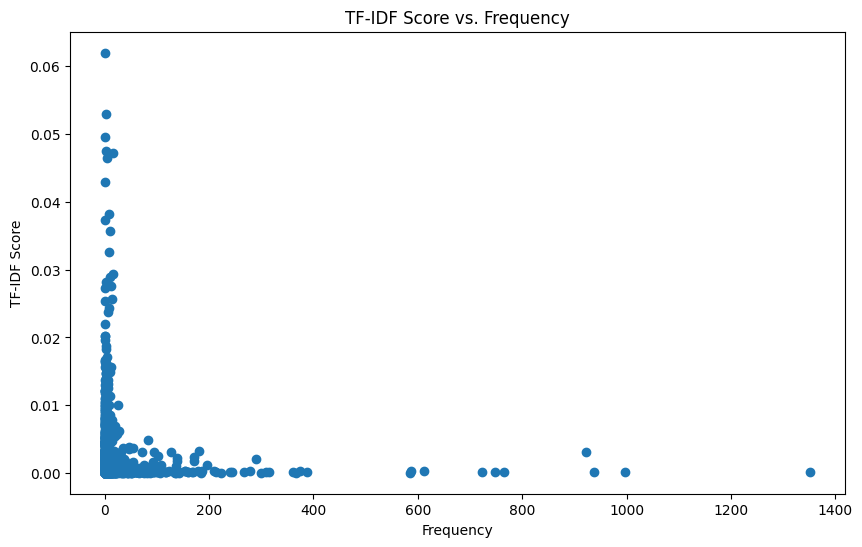

In [261]:
#計算frequency
frecuency  = X_counts.toarray().sum(axis=0)
indices = np.argsort(frecuency)[::-1]

#劃出分數對frequency的圖
plt.figure(figsize=(10, 6))
plt.scatter(frecuency[indices], tfidf_scores[indices])
plt.xlabel('Frequency')
plt.ylabel('TF-IDF Score')
plt.title('TF-IDF Score vs. Frequency')
plt.show()

#可以看到分數與出現頻率呈負相關，這是因為tf-idf是用來衡量一個字在一篇文章中的重要性，如果一個字在很多文章中都出現，那麼這個字的tf-idf分數就會很低

---
Naive Bayes classifier


In [269]:
#Naive Bayes classifier 使用tf-idf分數

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
# 注意，這裡使用的是tfidf_df
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, X['category'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

#不過我並沒有遇到需要換不同的nb分類器的情況?

Accuracy: 0.8666666666666667

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9490    0.7881    0.8611       236
    nostalgia     0.8031    0.9533    0.8718       214

     accuracy                         0.8667       450
    macro avg     0.8761    0.8707    0.8665       450
 weighted avg     0.8796    0.8667    0.8662       450



In [272]:
#Naive Bayes classifier 使用frequency

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
# 注意，這裡使用的是X_counts
X_train, X_test, y_train, y_test = train_test_split(X_counts, X['category'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8822222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9463    0.8220    0.8798       236
    nostalgia     0.8286    0.9486    0.8845       214

     accuracy                         0.8822       450
    macro avg     0.8875    0.8853    0.8822       450
 weighted avg     0.8903    0.8822    0.8821       450



---
#################################

Fourth: here

In [278]:
#在dummy duplicate的時候
#比起一個一個寫
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]
print(dummy_duplicate_dict)

#這樣寫可以更直觀更有效率
dummy = {
            'text': 'dummy record',
            'category': 1, 
            'category_name': "dummy category"
        }
dummy_duplicate_dict_new = [dummy, dummy]


print(dummy_duplicate_dict_new)

print(dummy_duplicate_dict == dummy_duplicate_dict_new)

[{'text': 'dummy record', 'category': 1, 'category_name': 'dummy category'}, {'text': 'dummy record', 'category': 1, 'category_name': 'dummy category'}]
[{'text': 'dummy record', 'category': 1, 'category_name': 'dummy category'}, {'text': 'dummy record', 'category': 1, 'category_name': 'dummy category'}]
True
